# 数据挖掘作业一

## 姓名：林宁       学号：3220190838

数据集: Wine Reviews

In [1]:
#导入必要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
from scipy import stats
from collections import Counter
from math import isnan

In [2]:
#读取数据集
path = "./dataset/wine-reviews/"
data_df = pd.read_csv(path+'winemag-data_first150k.csv', index_col=0)

In [3]:
data_df.head() #数据集总览

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
data_df.dtypes #每列数据类型

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [5]:
data_df.shape #数据集大小

(150930, 10)

# 3 数据分析要求

## 3.1 数据可视化和摘要

### 3.1.1 数据摘要

#### （1） 标称属性，给出每个可能聚会的频数

该数据集存在'country','designation','province','region_1','region_2','variety','winery'七个标称属性

通过函数value_counts() 来统计出所有标称属性所有取值的数量

In [6]:
pd.value_counts(data_df['country'])

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

In [7]:
pd.value_counts(data_df['designation'])

Reserve                                      2752
Reserva                                      1810
Estate                                       1571
Barrel sample                                1326
Riserva                                       754
Barrel Sample                                 639
Brut                                          624
Crianza                                       503
Estate Grown                                  449
Estate Bottled                                396
Dry                                           374
Old Vine                                      331
Gran Reserva                                  330
Brut Rosé                                     248
Extra Dry                                     244
Vieilles Vignes                               225
Bien Nacido Vineyard                          195
Rosé                                          180
Late Bottled Vintage                          171
Réserve                                       166


In [8]:
pd.value_counts(data_df['province'])

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
Mendoza Province                           4742
Oregon                                     4589
Burgundy                                   4308
Piedmont                                   4093
Veneto                                     3962
South Australia                            3004
Sicily & Sardinia                          2545
New York                                   2428
Northeastern Italy                         1982
Loire Valley                               1786
Alsace                                     1680
Marlborough                                1655
Southwest France                           1601
Central Italy                              1530
Southern Italy                             1439
Champagne                               

In [9]:
pd.value_counts(data_df['region_1'])

Napa Valley                              6209
Columbia Valley (WA)                     4975
Mendoza                                  3586
Russian River Valley                     3571
California                               3462
Paso Robles                              3053
Willamette Valley                        2096
Rioja                                    1893
Toscana                                  1885
Sonoma County                            1853
Brunello di Montalcino                   1746
Sicilia                                  1701
Alsace                                   1574
Sonoma Coast                             1473
Carneros                                 1458
Barolo                                   1398
Dry Creek Valley                         1398
Finger Lakes                             1372
Champagne                                1369
Santa Barbara County                     1319
Walla Walla Valley (WA)                  1225
Yakima Valley                     

In [10]:
pd.value_counts(data_df['region_2'])

Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

In [11]:
pd.value_counts(data_df['variety'])

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Pinot Gris                        1365
Barbera                           1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

In [12]:
pd.value_counts(data_df['winery'])

Williams Selyem                   374
Testarossa                        274
DFJ Vinhos                        258
Chateau Ste. Michelle             225
Columbia Crest                    217
Concha y Toro                     216
Kendall-Jackson                   216
Trapiche                          205
Bouchard Père & Fils              203
Kenwood                           191
De Loach                          189
Joseph Drouhin                    189
Georges Duboeuf                   188
Cameron Hughes                    172
Wines & Winemakers                169
Albert Bichot                     167
Robert Mondavi                    166
Louis Latour                      154
D'Arenberg                        153
Morgan                            153
Dry Creek Vineyard                153
Concannon                         151
Martin Ray                        149
Errazuriz                         148
Gary Farrell                      144
L'Ecole No. 41                    144
Olivier Lefl

#### （2） 数值属性，给出5数概括及缺失值的个数

In [13]:
pd.unique(data_df['points'])  #查看points是否有缺失值

array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80], dtype=int64)

points没有缺失值

In [14]:
pd.unique(data_df['price'])  #查看price是否有缺失值

array([ 235.,  110.,   90.,   65.,   66.,   73.,   60.,   80.,   48.,
        185.,  325.,  290.,   75.,   24.,   79.,  220.,   45.,   57.,
         62.,  105.,   15.,   37.,   nan,   22.,   42.,  135.,   29.,
         23.,   17.,   26.,   55.,   39.,   69.,   30.,   50.,   40.,
        100.,   68.,   28.,   18.,   25.,   36.,   38.,   85.,   19.,
         54.,   59.,   10.,   12.,   13.,   14.,   20.,  125.,    7.,
         49.,   93.,   32.,   16.,   21.,   44.,   35.,   61.,   34.,
         11.,   58.,  120.,   41.,  200.,   43.,    9.,   56.,   46.,
         92.,   94.,   27.,   95.,   33.,   70.,  155.,   63.,  130.,
        115.,   31.,   98.,   52.,   64.,   91.,  111.,   88.,   74.,
         77.,   87.,  113.,  140.,  500.,   51.,  150.,  240.,   72.,
        103.,    8.,  136.,  141.,  102.,   47.,   53.,   96.,   78.,
        149.,  138.,  117.,    4.,   99.,  848.,  450.,  330.,  175.,
         89.,   82.,   71.,  137.,  145.,  698.,  160.,  770.,  118.,
        238.,  202.,

price有缺失值

In [15]:
#查看points缺失值个数
print("The NULL value num of 'points' is:",data_df['points'].isnull().sum()) 

The NULL value num of 'points' is: 0


In [16]:
#查看price缺失值个数
print("The NULL value num of 'price' is:",data_df['price'].isnull().sum())  

The NULL value num of 'price' is: 13695


In [17]:
# points,price 的5数概括
number_data = ['points','price']
data_df[number_data].describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


points:最大值100，最小值80，均值87.89，中位数88，四分位数[86,88,90],缺失值个数为0

price:最大值2300，最小值4，均值33.13，中位数24，四分位数[16,24,40],缺失值个数为13695

### 3.1.2 数据可视化(只针对数值型数据)

#### 绘制points的直方图、q-q图、盒图

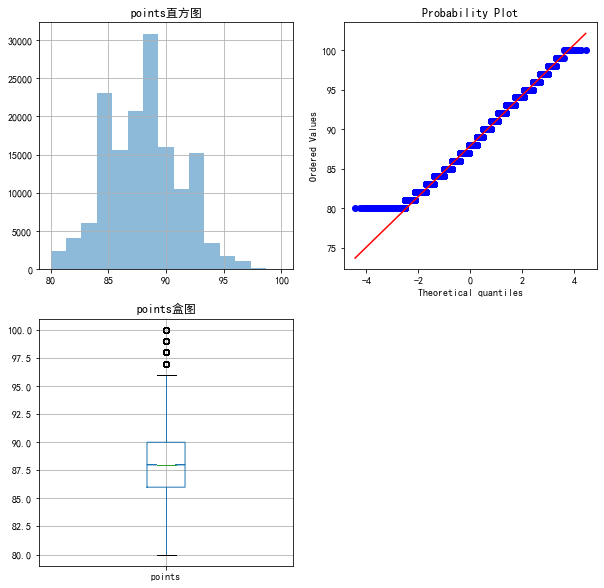

In [18]:
plt.figure(figsize=(10, 10))
#直方图
plt.subplot(2,2,1)
plt.title("points直方图")
data_df['points'].hist(alpha=0.5,bins=15)

#q-q图
plt.subplot(2,2,2)
stats.probplot(data_df['points'],dist="norm",plot=plt)

#盒图
plt.subplot(2,2,3)
plt.title("points盒图")
data_df['points'].plot(kind='box', notch=True, grid=True)
plt.show()

#### 绘制price的直方图、q-q图、盒图

E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


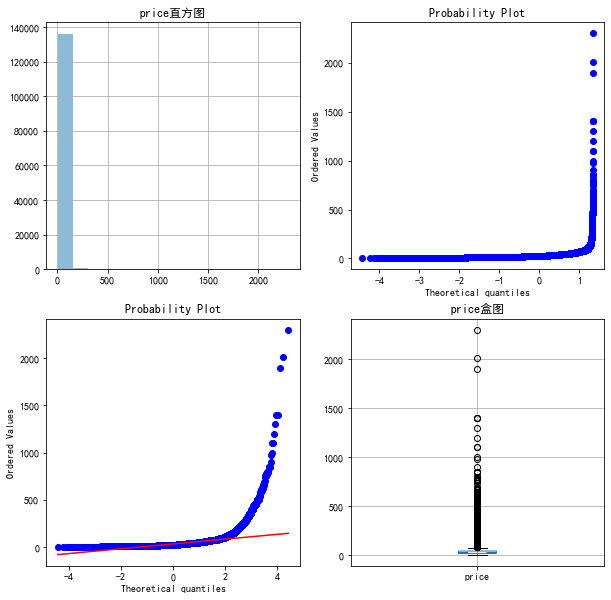

In [19]:
plt.figure(figsize=(10, 10))
#直方图
plt.subplot(2,2,1)
plt.title("price直方图")
data_df['price'].hist(alpha=0.5,bins=15)
        
#q-q图
plt.subplot(2,2,2)
stats.probplot(data_df['price'],dist="norm",plot=plt)

#去除缺失值再绘制q-q图                 
plt.subplot(2,2,3)
data = pd.DataFrame(data_df['price'])
data = data.dropna()
stats.probplot(data['price'], dist="norm", plot=plt)

#盒图
plt.subplot(2,2,4)
plt.title("price盒图")
data_df['price'].plot(kind='box', notch=True, grid=True)
plt.show()

由直方图、q-q图、盒图可以得出：

1.price属性分布不符合正态分布；

2.points属性分布符合正太分布特征，但不是完全正太分布。

## 3.2 数据缺失处理

In [20]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [21]:
missing_data(data_df) #原始数据

,country,description,designation,points,price,province,region_1,region_2,variety,winery
Total,5,0,45735,0,13695,5,25060,89977,0,0
Percent,0.00331279,0,30.3021,0,9.07374,0.00331279,16.6037,59.6151,0,0
Types,object,object,object,int64,float64,object,object,object,object,object


由上表可以看出，

数值型数据 price 存在缺失值 

标称型数据 country、designation、province、region_1、region_2 存在缺失值 

### 3.2.1 将缺失部分剔除

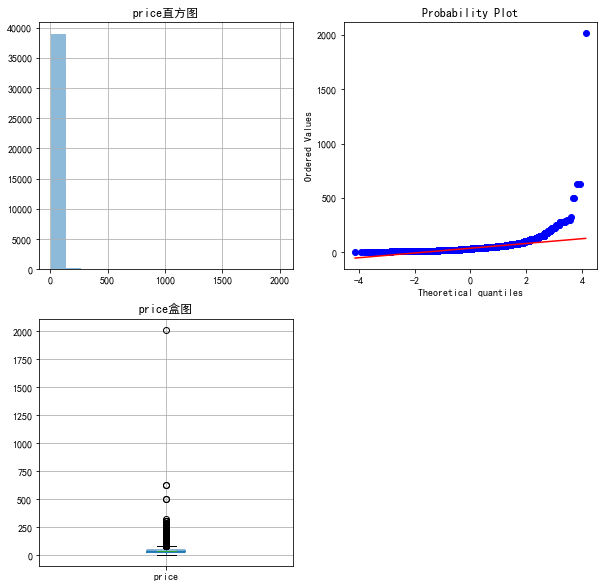

In [22]:
#将缺失部分剔除
del_df = data_df
del_df = del_df.dropna()

#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))
#直方图
plt.subplot(2,2,1)
plt.title("price直方图")
del_df['price'].hist(alpha=0.5,bins=15)

#q-q图
plt.subplot(2,2,2)
stats.probplot(del_df['price'],dist="norm",plot=plt)

#盒图
plt.subplot(2,2,3)
plt.title("price盒图")
del_df['price'].plot(kind='box', notch=True, grid=True)
plt.show()

In [23]:
missing_data(del_df)    #验证缺失部分剔除后数据是否有缺失值

,country,description,designation,points,price,province,region_1,region_2,variety,winery
Total,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,int64,float64,object,object,object,object,object


由上表看出，缺失部分剔除后的数据没有缺失值

In [24]:
del_df[['price']].describe()#缺失部分剔除后数据的5数概况

,price
count,39241.000000
mean,37.546316
std,26.716547
min,4.000000
25%,22.000000
50%,32.000000
75%,45.000000
max,2013.000000


缺失部分剔除后

price:最大值2013，最小值4，均值37.55，中位数32，四分位数[22,32,45],缺失值个数为0

### 3.2.2 用最高频率值来填补缺失值

In [25]:
# 用最高频率值来填补缺失值
fill_df = data_df
miss_features = ['country','designation','price','province','region_1','region_2']

for col in miss_features:
    word_counts = Counter(fill_df[col])
    top = word_counts.most_common(1)[0][0]
    if type(top) != str:
        if isnan(top):
            top = word_counts.most_common(2)[1][0]
    print(top, type(top))
    temp = fill_df[col].fillna(top)
    fill_df[col] = temp
fill_df.head()

US <class 'str'>
Reserve <class 'str'>
20.0 <class 'float'>
California <class 'str'>
Napa Valley <class 'str'>
Central Coast <class 'str'>


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Central Coast,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Central Coast,Provence red blend,Domaine de la Bégude


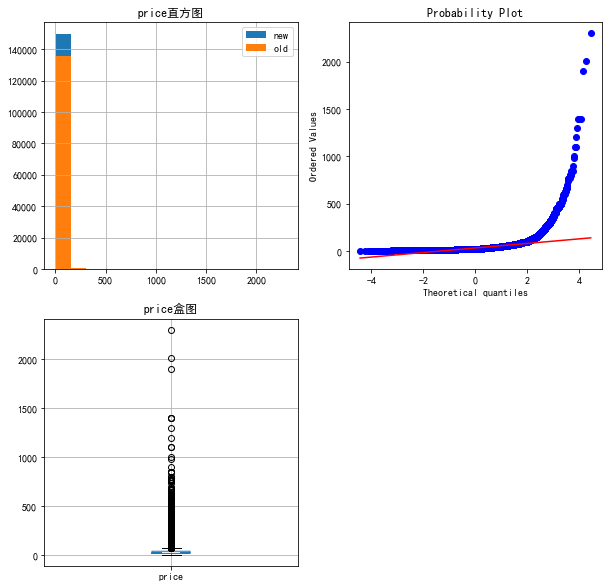

In [26]:
path = "./dataset/wine-reviews/"
data_df = pd.read_csv(path+'winemag-data_first150k.csv', index_col=0)

#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))
#直方图
plt.subplot(2,2,1)
plt.title("price直方图")
fill_df['price'].hist(bins=15)
data_df['price'].hist(bins=15)
plt.legend(['new','old'])

#q-q图
plt.subplot(2,2,2)
stats.probplot(fill_df['price'], dist="norm", plot=plt)

#盒图
plt.subplot(2,2,3)
plt.title("price盒图")
fill_df['price'].plot(kind='box', notch=True, grid=True)
plt.show()

In [27]:
missing_data(fill_df)  #验证用高频数据填补后数据是否有缺失值

,country,description,designation,points,price,province,region_1,region_2,variety,winery
Total,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,int64,float64,object,object,object,object,object


由上表看出，用高频数据填补后数据后的数据没有缺失值

In [28]:
fill_df[['price']].describe()  #用高频数据填补后数据的5数概况

,price
count,150930.000000
mean,31.939966
std,34.840211
min,4.000000
25%,16.000000
50%,22.000000
75%,38.000000
max,2300.000000


用高频数据填补后

price:最大值2300，最小值4，均值31.94，中位数22，四分位数[16,22,38],缺失值个数为0

### 3.2.3 通过属性的相关关系来填补缺失值

In [29]:
data_df.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [30]:
#通过属性的相关关系来填补缺失值
target_data = data_df['price']
source_data = data_df['points']
flag1 = target_data.isnull().values
flag2 = source_data.isnull().values
complete_data = target_data.copy()
i=0
for _, value in target_data.iteritems():    
    if (flag1[i] == True)and(flag2[i] == False):
        complete_data[i] = 104 - source_data[i]
    i=i+1
values_clean = list(complete_data.dropna().values)

# 去除频率为1的值
#for value, count in complete_data.value_counts().iteritems():
    #if count == 1:
     #   values_clean.remove(value)

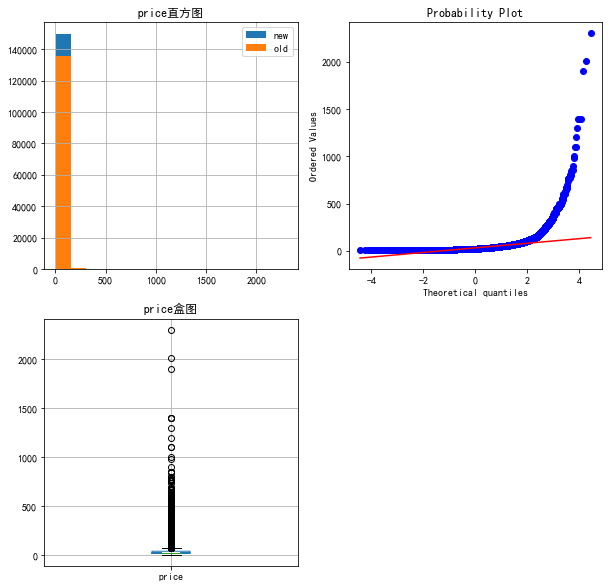

In [31]:
#绘制处理后数据的直方图、q-q图、盒图
fill_price2 = pd.DataFrame(values_clean,columns=['price'])
plt.figure(figsize=(10,10))
#直方图
plt.subplot(2,2,1)
plt.title("price直方图")
fill_price2['price'].hist(bins=15)
data_df['price'].hist(bins=15)
plt.legend(['new','old'])

#q-q图
plt.subplot(2,2,2)
stats.probplot(fill_price2['price'], dist="norm", plot=plt)


#盒图
plt.subplot(2,2,3)
plt.title("price盒图")
fill_price2['price'].plot(kind='box', notch=True, grid=True)

plt.show()

In [32]:
missing_data(fill_price2)  #验证通过相关关系填补后数据是否有缺失值

,price
Total,0
Percent,0
Types,float64


由上表看出，通过相关关系填补后数据后的数据没有缺失值

In [33]:
fill_price2.describe()  #通过相关关系填补后数据的5数概况

,price
count,150930.00000
mean,31.49576
std,35.03242
min,4.00000
25%,15.00000
50%,22.00000
75%,38.00000
max,2300.00000


通过相关关系填补后

price:最大值2300，最小值4，均值31.50，中位数22，四分位数[15,22,38],缺失值个数为0

### 3.2.4 通过数据对象之间的相似性来填补缺失值

In [34]:
numeric_attr = ['price','points']

#查找两个对象间的相似性
def find_dis_value(dataset, pos, column, numeric_attr):
    def dis_objs(tar_obj, sou_obj):
        dis_value = 0
        count = 0
        for column in tar_obj.index:
            if tar_obj[column] != np.NaN and sou_obj[column] != np.NaN:
                if column in numeric_attr:
                        values_sort = dataset[column].dropna().values.sort()
                        denominator = values_sort[-1] - values_sort[0]
                        dis_value += abs(tar_obj[column] - sou_obj[column])/denominator
                        count += 1

                elif tar_obj[column] == sou_obj[column]:
                    dis_value += 1
                count += 1
            else:
                continue
        return dis_value/count

    mindis = 9999
    result_pos = -1
    target_obj = dataset.ix[pos]
    for index in dataset.index:
        if index == pos:
            continue
        source_obj = dataset.ix(index)
        tmp = dis_objs(target_obj, source_obj)
        if tmp < mindis:
            result_pos = index
    return result_pos

# 通过数据对象之间的相似性来填补缺失值
data = data_df['price'].copy()
for index, value in data.iteritems():
    if value == np.NaN:
        data[index] = data[find_dis_value(data_df, index, 'price', numeric_attr)]

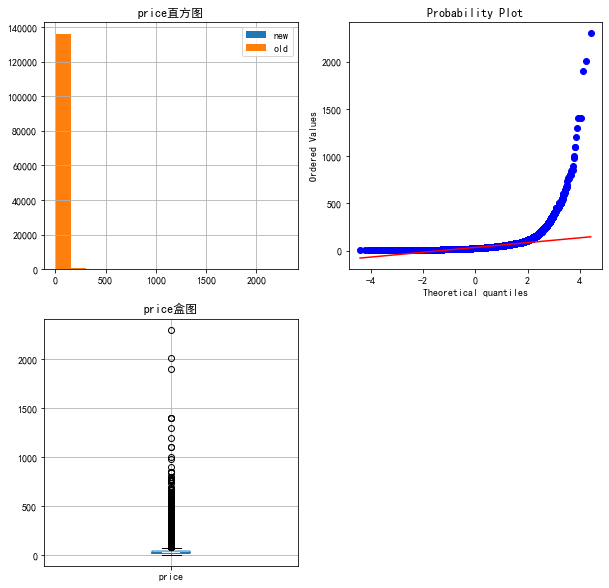

In [35]:
#绘制处理后数据的直方图、q-q图、盒图
plt.figure(figsize=(10,10))

#直方图
plt.subplot(2,2,1)
plt.title("price直方图")
data.hist(bins=15)
data_df['price'].hist(bins=15)
plt.legend(['new','old'])

#q-q图
plt.subplot(2,2,2)
stats.probplot(data.dropna(), dist="norm", plot=plt)

#盒图
plt.subplot(2,2,3)
plt.title("price盒图")
data.plot(kind='box', notch=True, grid=True)
plt.show()

In [36]:
data.describe()  #通过相似性填补后数据的5数概况

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

通过相似性填补后

price:最大值2300，最小值4，均值33.13，中位数24，四分位数[16,24,40],缺失值个数为0